# ChronoClimatic Traffic Trends: Analyzing the Impact of Time and Weather on Roadway Flow

Traffic is a topic which is relevant to almost all humans across the world. Having a greater understanding of traffic and what can affect it, allows us to plan and make better travel decisions whether it relates to getting to work or the airport to catch a flight. There is also an abundance of data on this subject to be explored.

In this project we will be utilising exploratory data visualisation methods to analyse a dataset of traffic volume collected on the I-94 interstate. We will explore the potential affects that time and weather conditions may have on traffic.

## Table Of Contents

* [The Dataset](#The-Dataset)
* [Analysing Traffic Volume](#Analysing-Traffic-Volume)
* [Traffic Volume: Day vs. Night](#Traffic-Volume:-Day-vs.-Night)
* [Traffic Volume: Day vs. Night (II)](#Traffic-Volume:-Day-vs.-Night-(II))
* [Time Indicators](#Time-Indicators):
    - [Month](#Month)
    - [Day Of The Week](#Day-Of-The-Week)
    - [Time of Day](#Time-of-Day)
* [Weather Indicators](#Weather-Indicators)
* [Weather Types](#Weather-Types)
* [Conclusion](#Conclusion)

## The Dataset

The dataset was made available by John Hogue. The documentation as well as a download link can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

##### Variables Table 
| Variable Name | DType | Description | Units | Missing Values |
| :--- | :---: | :--- | :---: | :---: |
| holiday | Categorical | US National holidays plus regional holiday, Minnesota State Fair |   | no |
| temp | Continuous | Average temp in kelvin | Kelvin | no |
| rain_1h | Continuous | Amount in mm of rain that occurred in the hour | mm | no |
| snow_1h | Continuous | Amount in mm of snow that occurred in the hour | mm | no |
| clouds_all | Integer | Percentage of cloud cover | % | no |
| weather_main | Categorical | Short textual description of the current weather | | no |
| weather_description | Categorical | Longer textual description of the current weather | | no |
| date_time | Date | Hour of the data collected in local CST time | | no |
| traffic_volume | Integer | Hourly I-94 ATR 301 reported westbound traffic volume | | no |

In [1]:
#Read in the CSV file and examine the first few and last few rows

import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


##### Initial Analysis
As per the [documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume), this data has been collected at a station midway between Minneapolis and St Paul, MN, relating specifically to **westbound** traffic. Thus, we should avoid making any generalisations for the entire I-94 highway.

Our dataset has 48204 rows and 9 columns each describing traffic and weather at 1 hour intervals. The data spans across a 6 year period from 2012-10-02 09:00:00 until 2018-09-30 23:00:00. There are no null values and the data types of each column is suitable to continue with our analysis.

## Analysing Traffic Volume

Lets start by looking at the traffic volume.

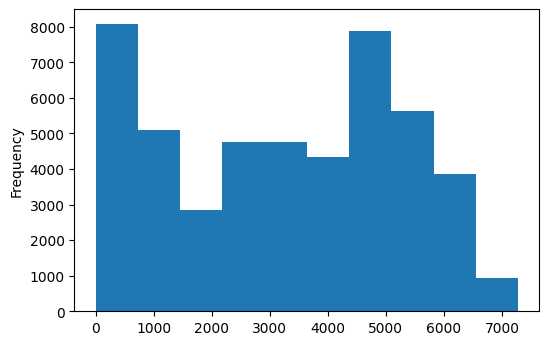

In [4]:
#Import matplotlib and plot a histogram for the "traffic_volume" column

import matplotlib.pyplot as plt
%matplotlib inline

traffic["traffic_volume"].plot.hist()
plt.show()

In [5]:
#Use the describe() method to look up a few statistics about the "traffic_volume" column

traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

At a first glance, we can see that the hourly traffic volume ranges from 0 to 7280 cars with an average of 3260 cars.

The histogram does not show a particular pattern with peaks of traffic volume frequencies at both about 500 cars and about 5000 cars. However we can note that traffic volumes of about 7000 cars are relatively rare.

Approximately 25% of the time, there were 1,193 or fewer cars passing the station per hour, possibly occurring during nighttime or road construction. Conversely, another 25% of the time, the traffic volume was significantly higher, with 4,933 or more cars passing each hour.

This observation offers an interesting perspective for our analysis: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night
We'll start by dividing the dataset into two parts:
- Daytime data: hours 7am to 7pm (12 hours)
- Nighttime data: hours 7pm to 7am (12 hours)

Although this criterion isn't perfect for distinguishing between nighttime and daytime, it provides a useful starting point.

In [6]:
#Transform the "date_time" column to 'datetime' dtype

traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [7]:
#Isolate every instance of "date_time" column into daytime data and nighttime data

day = traffic[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
night = traffic[(traffic["date_time"].dt.hour < 7) | (traffic["date_time"].dt.hour >= 19)]
print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


The fact that we do not have matching shapes for the day and night dataframes, even though we split them over 2 equal parts of 12 hours, suggests that there may be some hours over the 6 year span which are missing data.

As we can see in the example below, there are occasions where we are missing a few hours of data (11:00, 12:00 and 13:00). This would explain the disparity between the two shapes. However the difference makes for less than 1% of our overall data so we should still be fine to continue with our analysis.

In [8]:
traffic.iloc[205:207]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
205,None,275.34,0.0,0.0,1,Clear,sky is clear,2012-10-11 10:00:00,4638
206,None,284.10,0.0,0.0,50,Clear,sky is clear,2012-10-11 14:00:00,5557


## Traffic Volume: Day vs. Night (II)

Previously, we split the dataset into two sections: 
- Daytime data: 7 AM to 7 PM (12 hours) 
- Nighttime data: 7 PM to 7AM (12 hours)

Now, we will compare the traffic volume between the daytime and nighttime.

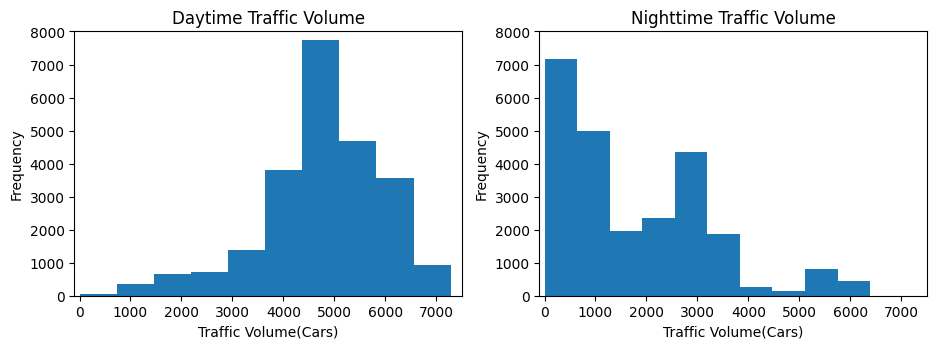

In [9]:
#Plot histograms of the "traffic_volume" column for both day and night

plt.figure(figsize = (11, 3.5))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Daytime Traffic Volume")
plt.xlabel("Traffic Volume(Cars)")
plt.ylabel("Frequency")
plt.ylim(0,8000)
plt.xlim(-100,7500)

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Nighttime Traffic Volume")
plt.xlabel("Traffic Volume(Cars)")
plt.ylabel("Frequency")
plt.ylim(0,8000)
plt.xlim(-100,7500)

plt.show()

In [10]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

##### Daytime results
The daytime histogram is negatively skewed which indicates that the traffic volume values are typically high. The traffic volume is also higher than 4252 cars 75% of the time. This translates to high traffic volume during the day.

##### Nighttime results
The nighttime histogram is positively skewed which indicates that the traffic volume values are typically low. The traffic volume is lower than 2819 cars 75% of the time. By comparison to our daytime results, this suggests significantly lower traffic volume during the night.

##### Summary
Although our nighttime traffic volume can reach peaks of around 6300 cars, this is an insignificant portion of our nighttime data and traffic at night is generally light. As our primary objective is to find indicators of heavy traffic, we will continue our analysis with the daytime data.

## Time Indicators

Time is one possible indicator of heavy traffic. There may be more people on the road during a specific month, on certain days, or at particular times of the day.

We will examine several line plots to observe how traffic volume fluctuates based on the following parameters:
- Month
- Day of the week
- Time of day

### Month

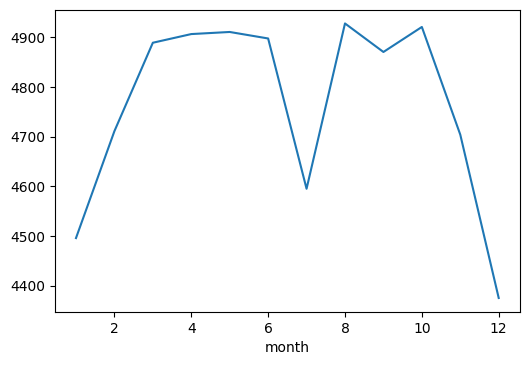

In [12]:
#Create a new column where values describe the month when the traffic volume measurement was taken
#Then group the dataset by the "month" column with the mean as an aggregate function

day = day.copy()
day["month"] = day['date_time'].dt.month
by_month = day.groupby("month").mean()

#Generate a line plot to visualise how the traffic volume changed each month

by_month['traffic_volume'].plot.line()
plt.show()

There is a visible decrease in traffic volume over the colder months (November - February). During the warmer months traffic volume seems to be higher, with one strange exception: July. What is so special about July? Is the traffic volume lower in July each year?

To answer the last question, lets examine how traffic volume changed in July each year.

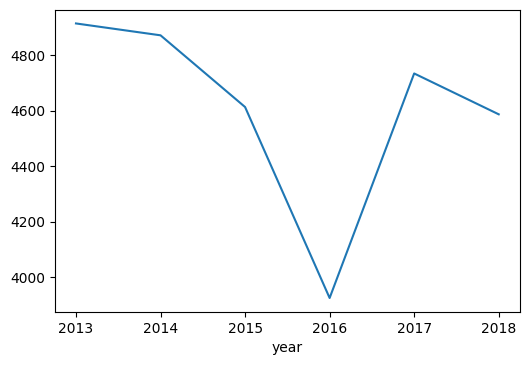

In [13]:
#Create a new column where values describe the year when the traffic volume measurement was taken

day["year"] = day["date_time"].dt.year
only_july = day[day["month"] == 7]

#Group the dataset by the "year" column with the mean as an aggregate function for July only
#Generate a line plot to visualise how the traffic volume changed each year in July

only_july.groupby("year").mean()["traffic_volume"].plot.line()
plt.show()

Traffic volume for the month of July is typically just as high as the other warm months. The only exception was July 2016. [This article](https://www.mprnews.org/story/2016/07/22/i94-stpaul-shutdown-twin-cities-weekend-road-woes) from Minnesota Public Radio can answer the reason for our findings, being that there was road construction on the I-94 in July of 2016.

As this would be an exception to the rule, we can conclude that generally there is more traffic in the warmer months of the year.

### Day Of The Week

Next we shall examine the data based on the day of the week.

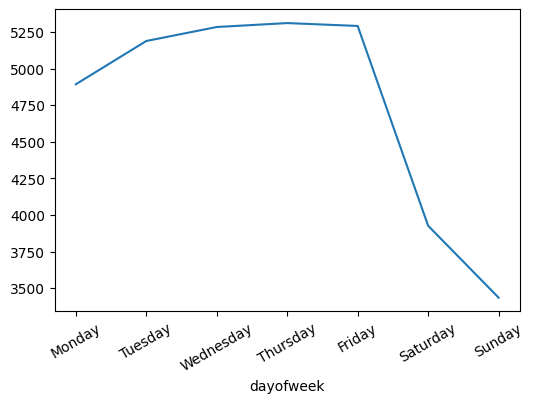

In [14]:
#Create a new column where values describe the day of the week
#Group the dataset by the "day of the week" column with the mean as an aggregate function

day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean() # 0 is Monday, 6 is Sunday

#Generate a line plot to visualise how the traffic volume changed each month

by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Monday", "Tuesday", "Wednesday", "Thursday",
                                          "Friday", "Saturday","Sunday"],
           rotation = 30)
plt.show()

There is a clear difference with business days (Monday to Friday) and the weekend. Business days show much heavier volumes of traffic with most days (excluding Monday) having over a 5000 car average. On the other hand, on weekends, traffic volume drops below an average of 4000 cars.

### Time of Day

Finally, we will analyse the data with regards to the time of day. However, weekends will lower the average values, prompting us to analyze them separately. To accomplish this, we'll initially split the data by day type: business days or weekends.

In [15]:
#Create a new column where values describe the hour of the day
#Split the data into business days and weekend dataframes
#Group the datasets by the "hour" column with the mean as an aggregate function

day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

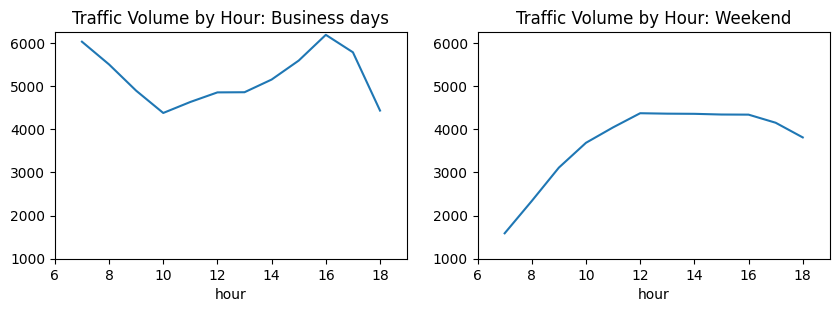

In [16]:
#Plot two line plots on a grid chart visualising traffic volume changes by time of day

plt.figure(figsize = (10, 3))
plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot.line()
plt.title("Traffic Volume by Hour: Business days")
plt.xlim(6,19)
plt.ylim(1000,6250)

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic Volume by Hour: Weekend")
plt.xlim(6,19)
plt.ylim(1000,6250)
plt.show()

The graphs above show that at all hours of the day time, traffic is heavier on business days than on weekends. As one would expect, on those days, traffic volume peaks at 7am and 4pm, around the times where most people would be travelling to and from work.

### Summary
To conclude, we have discovered a few time-related indicators of heavy traffic:
- Traffic tends to be heavier in warmer months
- Traffic tends to be heavier on business days
- Rush hours for those days are 7am and 4pm

## Weather Indicators
Another potential indicator of heavy traffic is weather. The dataset includes several useful columns related to weather conditions: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

Some of these columns are numerical, so let's begin by examining their correlation values with `traffic_volume`.

In [17]:
#Examine correlation values against "traffic_volume"

day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Of the columns relating to weather, `temp` offers the strongest correlation value (0.13). Although this still suggest a very weak correlation (or no correlation), lets plot for a scatter graph to confirm.

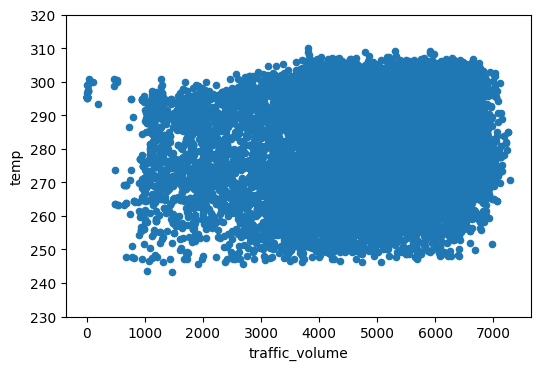

In [18]:
#Plot a scatter plot for "temp" and "traffic_volume"

day.plot.scatter("traffic_volume", "temp")
plt.ylim(230, 320) #To exclude two outliers that heavily skew the graph
plt.show()

As expected the temperature does not seem to be a reliable indicator of heavy traffic. As the other numerical weather columns suggested even closer to no correlation, we can move on to examining the descriptive weather columns.

## Weather Types

Next, we'll analyze the categorical weather-related columns (`weather_main` and `weather_description`) to determine if they contain more useful data.

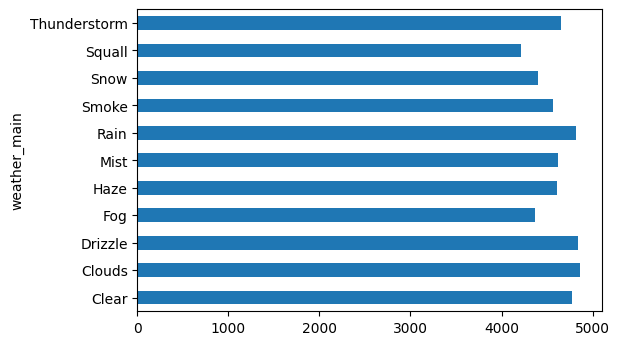

In [19]:
#Group the datasets by each column with the mean as an aggregate function

by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

#Create a bar plot for the "traffic_volume" against "weather_main"

by_weather_main["traffic_volume"].plot.barh()
plt.show()

None of the weather types show traffic volume exceeding 5,000 cars. As such, it is difficult identify any weather type as a heavy traffic indicator.

As `weather_description` has a more granular weather classification, lets examine that next.

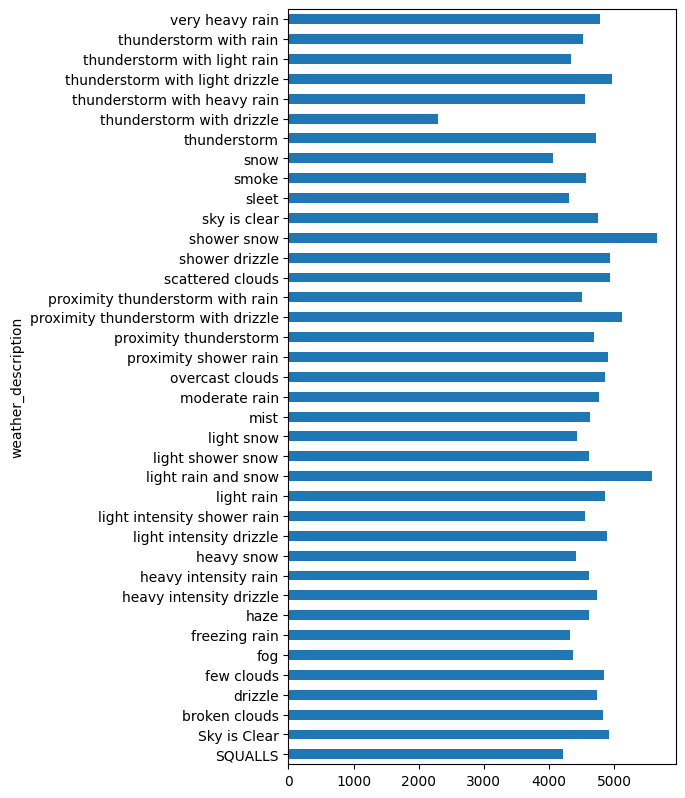

In [20]:
#Create a bar plot for the "traffic_volume" against "weather_description"

by_weather_description["traffic_volume"].plot.barh(figsize = (5, 10))
plt.show()

Our bar graph indicates three weather types where the traffic volume exceeds 5,000 cars:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

Although these are fairly bad weather conditions, they arent the worst. These having the highest frequency of heavy traffic may tell us that these weather conditions are bad enough to impact traffic but not so bad that people reconsider travelling altogether.

## Conclusion

In this project, we aimed to identify several indicators of heavy traffic on the I-94 Interstate highway. We successfully identified two types of indicators:
- Time Indicators
    - There is heavier traffic on warmer months (March - October) than the colder months (November - February)
    - Business days (Monday - Friday) have heavier traffic than weekends
    - Rush hour on business days are approximately 7am and 4pm

- Weather Indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle
    
Armed with this information, people can decide if they need more time getting to and from work or if they should explore different modes of transport not affected by traffic. They can also determine if they should run errands at another where they are less likely to be stuck in traffic due to time of day or weather conditions.